In [1]:
import matplotlib.pyplot as plt
import torch

In [116]:
lines = open("C:\\Windows\\Temp\\beep_and_monitor_feelings_data.txt", "r").readlines()

In [80]:
white_space = [] # indeksy odstepow dla konkretnych wartosci ze stringa
data = []
x = 0
break_signal = 0
nap_time = []
for line in lines[:]:
    break_signal = 0
    for k in line:
        if k == '#':
            nap_time.append({"time":0, "comment":line})
            break_signal = 1
        if k == ' ':
            white_space.append(x)
        x += 1
        #print(k)
    if break_signal != 1:
        data.append(int(line[25:len(lines[0])][:2]))
    #print(line)

In [81]:
white_space[:10]

[1, 3, 14, 23, 25, 29, 31, 42, 51, 53]

In [82]:
lines[0][15:23], lines[0][25:len(lines[0])][:2]

('08:22:18', ' 1')

In [83]:
xs = torch.tensor(data)
print(xs[:10])

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])


In [84]:
nap_time

[{'time': 0, 'comment': '# spałem aplikacja dzialala i czekala na decyzje\n'}]

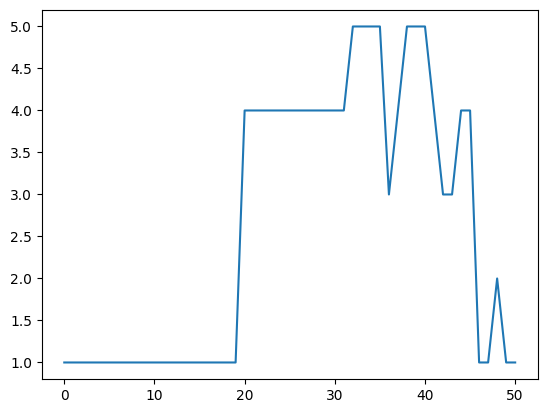

In [85]:
plt.plot(xs)

In [86]:
# ile jest sekund od 00:00 - 23:59:59 ?

In [87]:
all_day_sec = (60 * 60) * 24 # sec x mins x 24
all_day_sec

86400

In [88]:
# jestli mam sygnal o 3 - 07-08-2024 18:21:57 | 1

In [89]:
min_sec = (57) + (60 * 21)
min_sec

1317

In [90]:
hours = (18 * 60 * 60)
hours

64800

In [91]:
hours + min_sec

66117

In [92]:
xs = torch.zeros(1, 86400)

In [93]:
xs[0][hours + min_sec] += 1

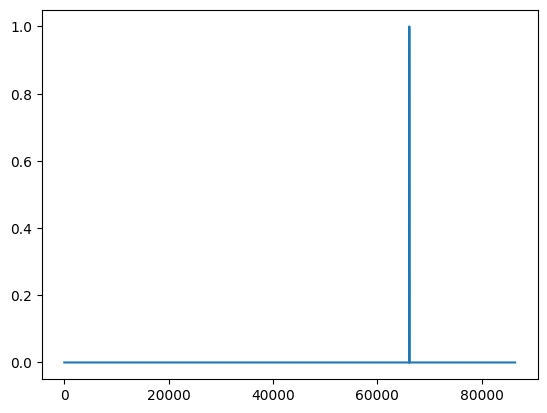

In [94]:
plt.plot(xs[0][:])

In [95]:
idx_of_p = []
idx_c = 0
length = 0;
for c in lines[0][15:23]:
    if c == ':':
        idx_of_p.append(idx_c)
    idx_c += 1
length = idx_c

In [96]:
idx_of_p, length

([2, 5], 8)

In [97]:
lines[0][15:23][0:2], lines[0][15:23][3:5], lines[0][15:23][6:length]

('08', '22', '18')

In [98]:
((int(lines[0][15:23][6:length]) + (60 * int(lines[0][15:23][3:5]))) + ((int(lines[0][15:23][0:2]) * 60 * 60)))

30138

In [106]:
index = 0
test = 0
data = []
data_only_4 = []
for line in lines[:]:
    if line[0] in "#":
        test = index
        continue
    #print("index -> ", index, test)
    if index != test:
        data_only_4.append( int(lines[index][25:len(lines[index])][:2]) )
        #print( lines[index][15:23][6:length] )
        #print(((int(lines[index][15:23][6:length]) + (60 * int(lines[index][15:23][3:5]))) + ((int(lines[index][15:23][0:2]) * 60 * 60))))
        data.append( (((int(lines[index][15:23][6:length]) + (60 * int(lines[index][15:23][3:5]))) + ((int(lines[index][15:23][0:2]) * 60 * 60)))) )
    index += 1

In [100]:
print(data)

[30441, 30748, 31052, 31356, 31670, 31975, 32287, 32592, 32896, 33200, 33504, 33808, 34112, 34416, 34719, 56048, 56354, 56658, 56966, 57770, 57778, 58026, 58482, 58666, 58885, 59331, 60626, 60952, 62799, 62883, 62887, 63348, 63352, 63363, 63382, 63386, 63390, 63393, 63411, 64444, 64531, 64535, 64538, 64771, 65718, 66117, 69937, 71318, 71636]


In [107]:
print(data_only_4)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 3, 4, 5, 5, 5, 4, 3, 3, 4, 4, 1, 1, 2, 1]


In [108]:
len(data) == len(data_only_4)

True

In [110]:
xs = torch.zeros(1, 86400)
ys = torch.zeros(1, 86400)

In [111]:
index = 0
chunk = 0
for i in xs[0][:]:
    try:
        if index == data[chunk]:
            #print(index)
            xs[0][index] = 1
            ys[0][index] = data_only_4[chunk]
            chunk += 1
    except IndexError:
        xs[0][index] = 0
    index += 1

In [113]:
xs[0][30441], ys[0][30441]

(tensor(1.), tensor(1.))

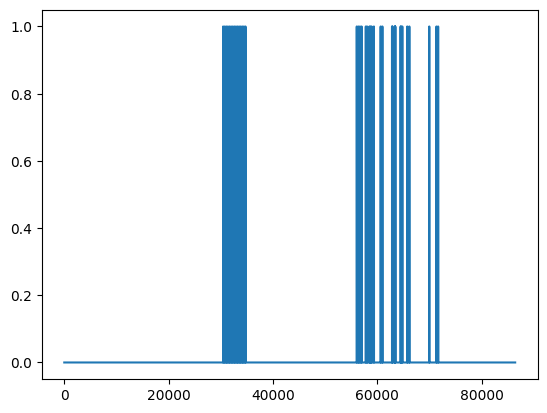

In [114]:
plt.plot(xs[0])

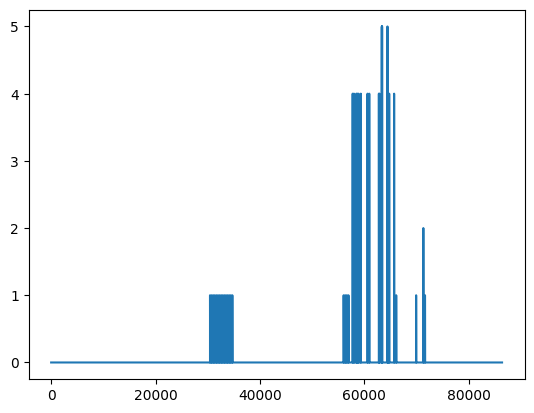

In [115]:
plt.plot(ys[0])